In [11]:
# Remember to update your path
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/rz14/Documents/QR_Qishi/QishiQR/')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model

import json
import warnings
warnings.filterwarnings(action='ignore')

# ====== Initial Configuration ========

try:
    with open('config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']

model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Major Contract
Major contract of Rb is 1605, 1610, 1701, 1705, 1710


## Build strategy

In [12]:
ASSET = 'rb'
ASSET_PATH = Path(config['Output path'], ASSET)
ASSET_PATH.mkdir(exist_ok=True, parents=True)

commodity = ASSET
exp_list = ['1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612', '1701',
                '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712']



# === Main Routine ===
try:
    strategy = pd.read_csv(Strategy_DIR+'{}_5min_Stra.csv'.format(ASSET))
    slm = strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
    slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
except:
    strategy = gen_strategy(commodity, exp_list, number_of_states, model_order, data_root_dir=DATA_DIR, output=OUTPUT_DIR)
    strategy.to_csv(Strategy_DIR+'{}_5min_Stra.csv'.format(ASSET),index=False)
    slm = strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
    slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)

In [13]:
slm.head()

,prior,0,1,2,total,signal
0,p,1398690,312438,320663,2031791,0
1,p0,1254606,70814,73197,1398617,0
2,p00,1212010,20787,21741,1254538,0
3,p000,1180703,15305,15939,1211947,0
4,p0000,1156378,11873,12392,1180643,0


## Rb 1701 Test - No cost

In [28]:
from Backtesting.Vectorized.models import OneContractTest
start = '20161101'
end = '20161231'
max_order=5
tcas = ['None']*max_order
test1 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test1.build('rb', '1701', max_order, freq, offset, start, end, tcas)
test1.run()

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,9.328679,0.559050,-0.004341,0.009139,0.005605,-0.06852,0.075297,-0.012670,2.105316,14.982036,4488,26.157268,0.648841
1,11.046741,0.663191,-0.002861,0.009331,0.007670,-0.04151,0.075297,-0.011385,3.261371,15.008749,3891,30.843597,0.846569
2,11.046741,0.663191,-0.002861,0.009331,0.007670,-0.04151,0.075297,-0.011385,3.261371,15.008749,3891,30.843597,0.846569
3,10.988173,0.654539,-0.002913,0.009336,0.007461,-0.04151,0.075297,-0.011666,3.205304,14.891903,3948,30.454264,0.823708
4,11.009373,0.656685,-0.002868,0.009321,0.007556,-0.04151,0.075297,-0.011405,3.250116,14.911957,3911,30.550833,0.835081


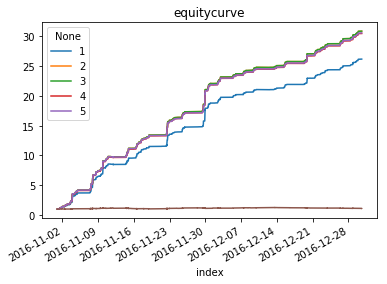

In [27]:
test1.plot()
test1.results[0]['benchmark'].plot()
test1.performance

test1.ensemblelabels

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,9.306479,0.546677,-0.001726,0.009156,0.005481,-0.06876,0.075177,-0.012969,5.304722,14.685389,4488,25.600468,0.638369
1,11.019603,0.649012,-0.002068,0.009370,0.007506,-0.04187,0.075177,-0.011663,4.530311,14.724041,3891,30.205557,0.829864
2,11.019603,0.649012,-0.002068,0.009370,0.007506,-0.04187,0.075177,-0.011663,4.530311,14.724041,3891,30.205557,0.829864
3,10.961004,0.640619,-0.001930,0.009379,0.007302,-0.04187,0.075177,-0.011949,4.860830,14.611326,3948,29.827864,0.807244
4,10.981872,0.642701,-0.002010,0.009362,0.007395,-0.04187,0.075177,-0.011682,4.657281,14.630957,3911,29.921553,0.818461


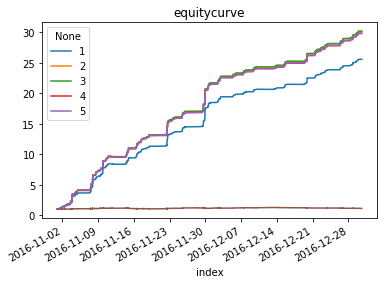

In [65]:
start = '20161101'
end = '20161231'
max_order=5
tcas = ['Fixed']*max_order
test2 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test2.build('rb', '1701', max_order, freq, offset, start, end, tcas)
test2.run()

test2.plot(target_col='equitycurve')
ax=plt.gca()
test2.results[0]['benchmark'].plot()
test2.performance

In [95]:
test2.results[0]

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,...,Direction,prior,signal,tradeID,return,signal_bar,strategy,benchmark,equitycurve,drawdown
index,,,,,,,,,,,,,,,,,,,,,
2016-11-01 00:00:00,rb1701,20161031.0,1.477926e+12,2594.0,2627.0,2570.0,0.0,0.0,1620318.0,4.207770e+10,...,0,p,0,1,0.000000,0,0.000000,1.000000,1.000000,0.000000
2016-11-01 00:05:00,rb1701,20161031.0,1.477926e+12,2594.0,2627.0,2570.0,0.0,0.0,1620318.0,4.207770e+10,...,0,p0,0,1,0.000000,0,0.000000,1.000000,1.000000,0.000000
2016-11-01 00:10:00,rb1701,20161031.0,1.477926e+12,2594.0,2627.0,2570.0,0.0,0.0,1620318.0,4.207770e+10,...,0,p0,0,1,0.000000,0,0.000000,1.000000,1.000000,0.000000
2016-11-01 00:15:00,rb1701,20161031.0,1.477926e+12,2594.0,2627.0,2570.0,0.0,0.0,1620318.0,4.207770e+10,...,0,p0,0,1,0.000000,0,0.000000,1.000000,1.000000,0.000000
2016-11-01 00:20:00,rb1701,20161031.0,1.477926e+12,2594.0,2627.0,2570.0,0.0,0.0,1620318.0,4.207770e+10,...,0,p0,0,1,0.000000,0,0.000000,1.000000,1.000000,0.000000
2016-11-01 00:25:00,rb1701,20161031.0,1.477926e+12,2594.0,2627.0,2570.0,0.0,0.0,1620318.0,4.207770e+10,...,0,p0,0,1,0.000000,0,0.000000,1.000000,1.000000,0.000000
2016-11-01 00:30:00,rb1701,20161031.0,1.477926e+12,2594.0,2627.0,2570.0,0.0,0.0,1620318.0,4.207770e+10,...,0,p0,0,1,0.000000,0,0.000000,1.000000,1.000000,0.000000
2016-11-01 00:35:00,rb1701,20161031.0,1.477926e+12,2594.0,2627.0,2570.0,0.0,0.0,1620318.0,4.207770e+10,...,0,p0,0,1,0.000000,0,0.000000,1.000000,1.000000,0.000000
2016-11-01 00:40:00,rb1701,20161031.0,1.477926e+12,2594.0,2627.0,2570.0,0.0,0.0,1620318.0,4.207770e+10,...,0,p0,0,1,0.000000,0,0.000000,1.000000,1.000000,0.000000


# rb-1705 No cost

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,10.102080,0.572339,-0.005072,0.010107,0.006154,-0.065965,0.077450,-0.014230,1.992612,14.163888,4185,26.755251,0.650896
1,11.897641,0.676827,-0.003252,0.010320,0.008367,-0.040607,0.081418,-0.016699,3.173056,14.221864,3640,31.457195,0.837912
2,11.897641,0.676827,-0.003252,0.010320,0.008367,-0.040607,0.081418,-0.016699,3.173056,14.221864,3640,31.457195,0.837912
3,11.773592,0.669429,-0.003228,0.010314,0.008122,-0.040607,0.081418,-0.016788,3.195011,14.214621,3709,31.124287,0.813966
4,11.895993,0.674597,-0.003289,0.010353,0.008249,-0.040607,0.081418,-0.016735,3.147656,14.176982,3680,31.356871,0.823913


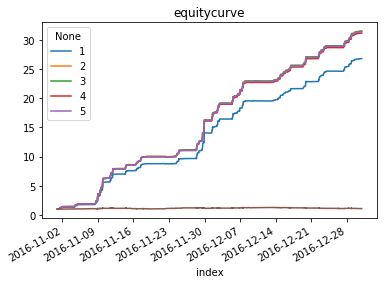

In [66]:
start = '20161101'
end = '20161231'
max_order=5
tcas = ['None']*max_order

test3 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test3.build('rb', '1705', max_order, freq, offset, start, end, tcas)
test3.run()

test3.plot(target_col='equitycurve')
ax=plt.gca()
test3.results[0]['benchmark'].plot()
test3.performance

## rb-1705 Fixed Cost

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,10.064196,0.560515,-0.002220,0.010097,0.006027,-0.066205,0.077330,-0.017210,4.548550,13.923489,4185,26.223171,0.643011
1,11.852543,0.663363,-0.002361,0.010364,0.008201,-0.040847,0.081178,-0.018547,4.390267,13.991987,3640,30.851315,0.822527
2,11.852543,0.663363,-0.002361,0.010364,0.008201,-0.040847,0.081178,-0.018547,4.390267,13.991987,3640,30.851315,0.822527
3,11.727618,0.656242,-0.002186,0.010347,0.007962,-0.040847,0.081178,-0.018563,4.733302,13.989242,3709,30.530887,0.799946
4,11.849657,0.661365,-0.002319,0.010399,0.008087,-0.040847,0.081178,-0.018505,4.484384,13.953255,3680,30.761431,0.808696


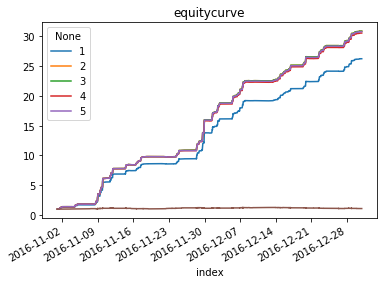

In [67]:
start = '20161101'
end = '20161231'
max_order=5
tcas = ['Fixed']*max_order
test4 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test4.build('rb', '1705', max_order, freq, offset, start, end, tcas)
test4.run()

test4.plot(target_col='equitycurve')
ax=plt.gca()
test4.results[0]['benchmark'].plot()
test4.performance

## Rb1705 different frequency
The SLM stragety is still of 5-min frequency
Just check the time dependence.

In [72]:
start = '20161101'
end = '20161231'
max_order=5
freqs = ['{}min'.format(i) for i in range(1, 5)]
tcas = ['Fixed']*max_order

test5 = MultiFrequencyTest(DATA_DIR, OUTPUT_DIR, slm)
test5.build('rb', '1705', max_order, freqs, offset, start, end, tcas)
test5.run()

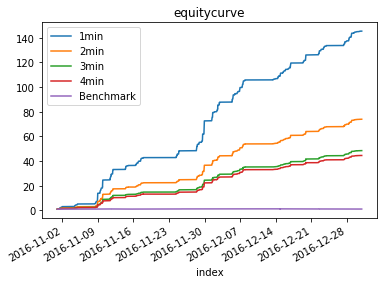

In [74]:
test5.plot(target_col='equitycurve')
ax=plt.gca()
test5.results[0]['benchmark'].plot()
test5.performance
plt.legend([i for i in freqs]+['Benchmark'])

# Results for minor contracts

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,4.492528,0.140004,-0.001982,0.006909,0.002454,-0.028089,0.037568,-0.070898,3.486138,7.790952,2510,7.160188,0.446215
1,5.401792,0.164326,-0.003258,0.007008,0.003681,-0.033190,0.037568,-0.146143,2.151134,7.605175,1964,8.230357,0.645112
2,5.401187,0.164401,-0.003261,0.007003,0.003683,-0.033190,0.037568,-0.144250,2.147906,7.609468,1964,8.233629,0.645621
3,5.387056,0.163297,-0.002658,0.007123,0.003376,-0.028089,0.037568,-0.119556,2.679897,7.578214,2128,8.185070,0.575188
4,5.413599,0.162910,-0.002711,0.007250,0.003493,-0.030433,0.037568,-0.119839,2.674436,7.523200,2052,8.168055,0.581871


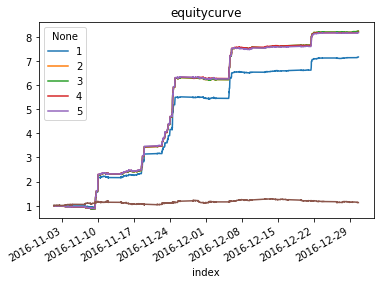

In [75]:
start = '20161101'
end = '20161231'
max_order=5
tcas = ['Fixed']*max_order
test6 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test6.build('rb', '1702', max_order, freq, offset, start, end, tcas)
test6.run()

test6.plot(target_col='equitycurve')
ax=plt.gca()
test6.results[0]['benchmark'].plot()
test6.performance

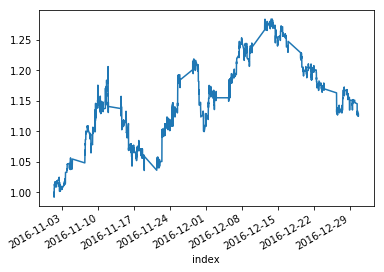

In [76]:
test6.results[0]['benchmark'].plot()

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,4.586564,0.146901,-0.001420,0.010048,0.002945,-0.05907,0.043243,-0.145811,7.075522,8.007158,2195,7.463660,0.341230
1,5.810136,0.184391,-0.002702,0.010005,0.004714,-0.05907,0.043243,-0.188371,3.702681,7.934023,1721,9.113204,0.542127
2,5.809714,0.184438,-0.002697,0.010005,0.004715,-0.05907,0.043243,-0.187737,3.708988,7.936630,1721,9.115280,0.542127
3,5.721598,0.183408,-0.001992,0.010362,0.004332,-0.05907,0.043243,-0.136951,5.201425,8.013838,1863,9.069945,0.471820
4,5.753003,0.181926,-0.002053,0.010488,0.004566,-0.05907,0.043243,-0.193581,5.108072,7.905702,1753,9.004748,0.488306


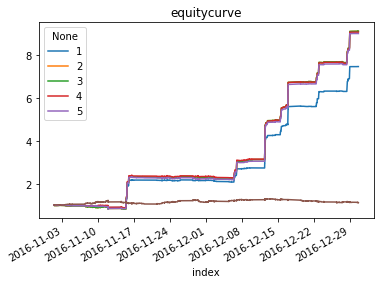

In [98]:
start = '20161101'
end = '20161231'
max_order=5
tcas = ['Fixed']*max_order
test6 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test6.build('rb', '1703', max_order, freq, offset, start, end, tcas)
test6.run()

test6.plot(target_col='equitycurve')
ax=plt.gca()
test6.results[0]['benchmark'].plot()
test6.performance

# The result is so good. We have to make sure that it is correct

## Add noise to the tick data - 1705

==========Noise=0==========
   Annualized Volatility  Average Daily Return  Average Negative Return  \
0              10.064196              0.560515                -0.002220   
1              11.852543              0.663363                -0.002361   
2              11.852543              0.663363                -0.002361   
3              11.727618              0.656242                -0.002186   
4              11.849657              0.661365                -0.002319   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.010097                  0.006027             -0.066205   
1                 0.010364                  0.008201             -0.040847   
2                 0.010364                  0.008201             -0.040847   
3                 0.010347                  0.007962             -0.040847   
4                 0.010399                  0.008087             -0.040847   

   Largest Winning Trade  Max Drawdown  Profit Facto

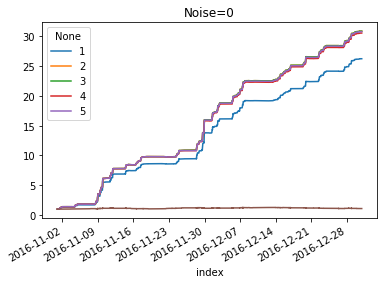

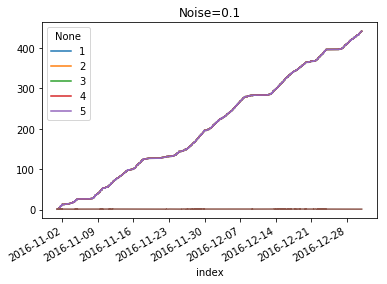

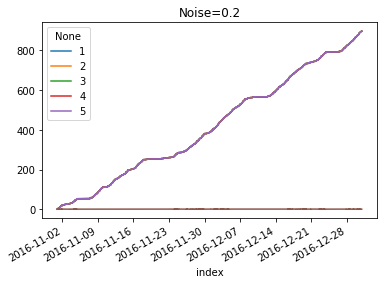

In [60]:
from Backtesting.Vectorized.models import NoisyOneContractTest

start = '20161101'
end = '20161231'
max_order=5
tcas = ['Fixed']*max_order

print('='*10 + 'Noise=0' + '='*10)
test_noise = NoisyOneContractTest(DATA_DIR, OUTPUT_DIR, slm, noise=0.)
test_noise.build('rb', '1705', max_order, freq, offset, start, end, tcas)
test_noise.run()

test_noise.plot(target_col='equitycurve')
ax=plt.gca()
plt.title('Noise=0')
test_noise.results[0]['benchmark'].plot()
print(test_noise.performance)

print('='*10 + 'Noise=0.1' + '='*10)
test_noise = NoisyOneContractTest(DATA_DIR, OUTPUT_DIR, slm, noise=0.1)
test_noise.build('rb', '1705', max_order, freq, offset, start, end, tcas)
test_noise.run()

test_noise.plot(target_col='equitycurve')
ax=plt.gca()
plt.title('Noise=0.1')
test_noise.results[0]['benchmark'].plot()
print(test_noise.performance)

print('='*10 + 'Noise=0.2' + '='*10)
test_noise = NoisyOneContractTest(DATA_DIR, OUTPUT_DIR, slm, noise=0.2)
test_noise.build('rb', '1705', max_order, freq, offset, start, end, tcas)
test_noise.run()

test_noise.plot(target_col='equitycurve')
ax=plt.gca()
plt.title('Noise=0.2')
test_noise.results[0]['benchmark'].plot()
print(test_noise.performance)

# Check correlations

In [108]:
from Utils.IOUtils import df_reader

instrument_a = 'rb1705'
commodity = 'rb'
data_path = DATA_DIR+'/rb'
offset = 0
freq = ['1min','5min','10min']
data = [df_reader(instrument_a + '*', topdir=data_path + '/day',
                 offset=offset, freq=f,day=True, symbol=commodity).get_tick(raw=False) for f in freq]

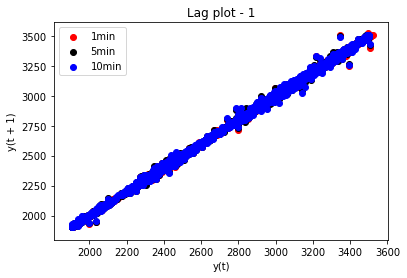

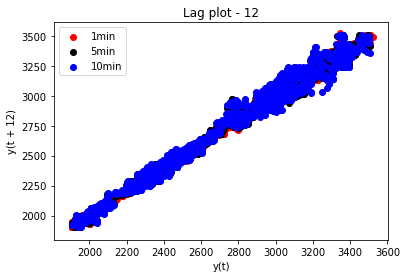

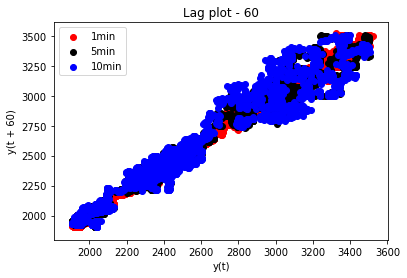

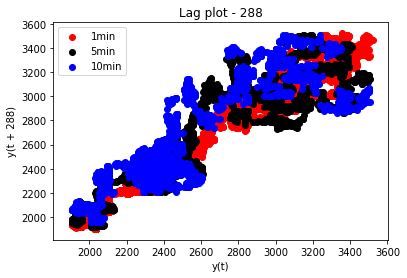

In [124]:
from pandas.tools.plotting import lag_plot,autocorrelation_plot
from datetime import timedelta
color=['r','k','b']
for lg in [1,int(timedelta(hours=1)/timedelta(minutes=5)),
           int(timedelta(hours=5)/timedelta(minutes=5)),int(timedelta(hours=24)/timedelta(minutes=5))]:
    for i, d in enumerate(data):
        lag_plot(d['LastPrice'],lg,c=color[i])
    plt.legend([
        '1min','5min','10min'
    ])
    plt.title('Lag plot - {}'.format(lg))
    plt.show()

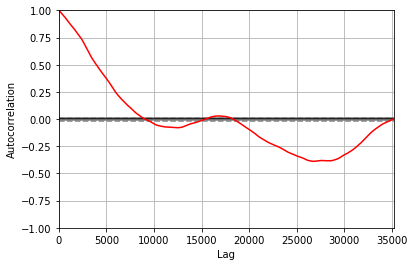

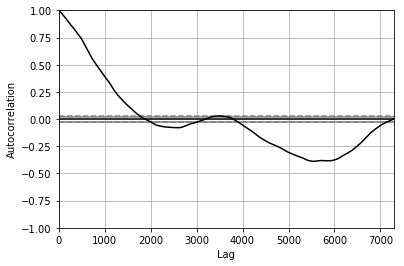

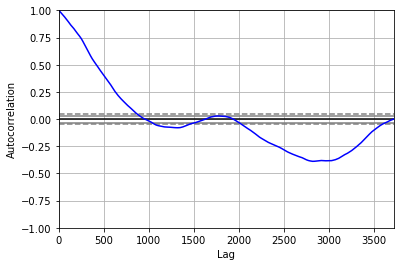

In [119]:
for i, d in enumerate(data):
    autocorrelation_plot(d['LastPrice'],c=color[i])
    plt.show()

In [96]:
from Utils.IOUtils import df_reader

instrument_a = 'ag1705'
commodity = 'ag'
data_path = DATA_DIR+commodity
offset = 0
freq = '5min'
data = df_reader(instrument_a + '*', topdir=data_path + '/day',
                 offset=offset, freq=freq,day=True, symbol=commodity).get_tick(raw=False)

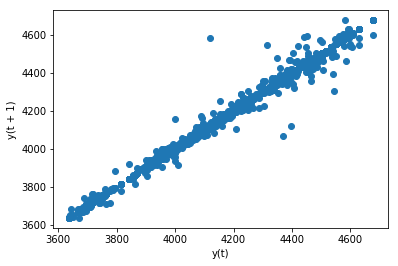

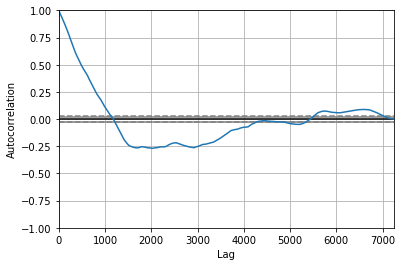

In [97]:
lag_plot(data['LastPrice'])
plt.show()
autocorrelation_plot((data['LastPrice']))
plt.show()

In [100]:
data

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,...,BidVolume1,BidVolume2,BidVolume3,BidVolume4,BidVolume5,Type,AveragePrice,UpperLimitPrice,LowerLimitPrice,UpdateTime
2016-05-17 09:05:00,ag1705,20160517.0,1.463447e+12,3856.0,3909.0,3856.0,0.0,0.0,28.0,1625040.0,...,2.0,0.0,0.0,0.0,0.0,-1.0,3869.0,4355.0,3422.0,09:04:33.000
2016-05-17 09:10:00,ag1705,20160517.0,1.463447e+12,3856.0,3909.0,3856.0,0.0,0.0,28.0,1625040.0,...,2.0,0.0,0.0,0.0,0.0,-1.0,3869.0,4355.0,3422.0,09:07:57.000
2016-05-17 09:15:00,ag1705,20160517.0,1.463448e+12,3841.0,3909.0,3841.0,4.0,230460.0,32.0,1855500.0,...,5.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:13:54.000
2016-05-17 09:20:00,ag1705,20160517.0,1.463448e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,5.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:19:34.000
2016-05-17 09:25:00,ag1705,20160517.0,1.463448e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,5.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:22:34.500
2016-05-17 09:30:00,ag1705,20160517.0,1.463449e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,8.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:29:47.500
2016-05-17 09:35:00,ag1705,20160517.0,1.463449e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,13.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:34:44.000
2016-05-17 09:40:00,ag1705,20160517.0,1.463449e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,13.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:37:36.500
2016-05-17 09:45:00,ag1705,20160517.0,1.463449e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,13.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:43:38.000
2016-05-17 09:50:00,ag1705,20160517.0,1.463450e+12,3841.0,3909.0,3841.0,0.0,0.0,32.0,1855500.0,...,6.0,0.0,0.0,0.0,0.0,-1.0,3865.0,4355.0,3422.0,09:49:39.000
